In [1]:
from lsst.sims.ocs.downtime.unscheduled_downtime import UnscheduledDowntime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
ud = UnscheduledDowntime()
# Twenty year survey in days
survey_length = 7300
do_random = False
seed = 1635995200
ud.initialize(use_random_seed=do_random, random_seed=seed)
#ud.initialize(use_random_seed=do_random, random_seed=seed, func=ud.trial)

In [52]:
print("Total Number of Downtimes: {}".format(len(ud)))
print("Total Downtime: {} days".format(ud.total_downtime))

Total Number of Downtimes: 176
Total Downtime: 376 days


In [53]:
# Create arrays for the downtime modes
nights = np.arange(survey_length) + 1
minor = np.zeros(survey_length)
intermediate = np.zeros(survey_length)
major = np.zeros(survey_length)
catastrophic = np.zeros(survey_length)

In [54]:
for (n, duration, event_type) in ud.downtimes:
    if event_type.startswith("minor"):
        minor[n - 1] = duration
    if event_type.startswith("intermediate"):
        intermediate[n - 1] = duration
    if event_type.startswith("major"):
        major[n - 1] = duration
    if event_type.startswith("catastrophic"):
        catastrophic[n - 1] = duration

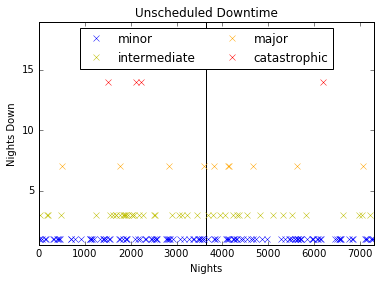

In [55]:
plt.plot(nights, minor, 'bx', label='minor')
plt.plot(nights, intermediate, 'yx', label='intermediate')
plt.plot(nights, major, 'x', color="orange", label='major')
plt.plot(nights, catastrophic, 'rx', label='catastrophic')
plt.xlim(1, survey_length)
ymin = ud.MINOR_EVENT[1] - 0.5
ymax = ud.CATASTROPHIC_EVENT[1] + 5
plt.ylim(ymin, ymax)
plt.title("Unscheduled Downtime")
plt.xlabel("Nights")
plt.ylabel("Nights Down")
plt.legend(loc='upper center', numpoints=1, ncol=2)
plt.vlines(3650, ymin, ymax)

In [56]:
def statistics(label, nights, down_arr):
    mask = nights[down_arr > 0]
    diff = mask[1:] - mask[:-1]
    mean = np.mean(diff)
    print("{} Events".format(label))
    print("Total Number: {}".format(len(mask)))
    print("Time to First Failure: {} days".format(mask[0]))
    print("Mean Time Bewteen Failures: {} days".format(mean))
    print("Median Time Bewteen Failures: {} days".format(np.median(diff)))
    print("Variance of Time Between Failures: {} days".format(np.var(diff)))
    print("Standard Deviation of Time Between Failures: {} days".format(np.std(diff)))

In [57]:
statistics("Catastrophic", nights, catastrophic)
statistics("Major", nights, major)
statistics("Intermediate", nights, intermediate)
statistics("Minor", nights, minor)

Catastrophic Events
Total Number: 4
Time to First Failure: 1497 days
Mean Time Bewteen Failures: 1569.0 days
Median Time Bewteen Failures: 620.0 days
Variance of Time Between Failures: 2971020.66667 days
Standard Deviation of Time Between Failures: 1723.66489396 days
Major Events
Total Number: 10
Time to First Failure: 506 days
Mean Time Bewteen Failures: 729.222222222 days
Median Time Bewteen Failures: 764.0 days
Variance of Time Between Failures: 216586.395062 days
Standard Deviation of Time Between Failures: 465.388434602 days
Intermediate Events
Total Number: 44
Time to First Failure: 34 days
Mean Time Bewteen Failures: 167.139534884 days
Median Time Bewteen Failures: 111.0 days
Variance of Time Between Failures: 27696.8642509 days
Standard Deviation of Time Between Failures: 166.423749059 days
Minor Events
Total Number: 118
Time to First Failure: 7 days
Mean Time Bewteen Failures: 62.2051282051 days
Median Time Bewteen Failures: 36.0 days
Variance of Time Between Failures: 4103.18